# Project 1

## Regression

Source File: https://www.kaggle.com/swathiachath/kc-housesales-data

- The test dataset had no target component which would make it difficult to find the accuracy of our model. So we considered the train.csv for the entirity of the dataset.
- Dataset had time series component. Tp remove this we considered the sales price for the months of Jan 2015 and Feb 2015.

- Data Description
- id : a notation for a house
- date: Date house was sold
- price: Price is prediction target
- bedrooms: Number of Bedrooms/House
- bathrooms: Number of bathrooms/bedrooms
- sqft_living: square footage of the home
- sqft_lot: square footage of the lot
- floorsTotal floors (levels) in house
- waterfrontHouse which has a view to a waterfront
- viewHas been viewed
- condition : How good the condition is ( Overall ). 1 indicates worn out property and 5 excellent. 
- gradeoverall grade given to the housing unit, based on King County grading system. 1 poor ,13 excellent.
- sqft_abovesquare footage of house apart from basement
- sqft_basementsquare footage of the basement
- yr_builtBuilt Year
- yr_renovatedYear when house was renovated
- zipcodezip
- latLatitude coordinate
- longLongitude coordinate
- sqft_living15Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
- sqft_lot15lotSize area in 2015(implies-- some renovations)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
hd = pd.read_csv('kc_house_data.csv') #csv to python data frame format
hd.shape
#df = pd.read_csv('ToyotaCorolla.csv')

(2225, 21)

In [3]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 21 columns):
id               2225 non-null int64
date             2225 non-null object
price            2225 non-null float64
bedrooms         2225 non-null int64
bathrooms        2225 non-null float64
sqft_living      2107 non-null float64
sqft_lot         2225 non-null int64
floors           2225 non-null float64
waterfront       2225 non-null int64
view             2225 non-null int64
condition        2225 non-null int64
grade            2225 non-null int64
sqft_above       2225 non-null int64
sqft_basement    2225 non-null int64
yr_built         2225 non-null int64
yr_renovated     2225 non-null int64
zipcode          2225 non-null int64
lat              2225 non-null float64
long             2225 non-null float64
sqft_living15    2225 non-null int64
sqft_lot15       2225 non-null int64
dtypes: float64(6), int64(14), object(1)
memory usage: 365.2+ KB


In [4]:
hd.isnull().sum()

id                 0
date               0
price              0
bedrooms           0
bathrooms          0
sqft_living      118
sqft_lot           0
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above         0
sqft_basement      0
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
sqft_living15      0
sqft_lot15         0
dtype: int64

### Categorical/Ordinal  Variables

In [5]:
print(hd['condition'].value_counts())
print(hd['waterfront'].value_counts())
print(hd['grade'].value_counts())

3    1465
4     573
5     155
2      27
1       5
Name: condition, dtype: int64
0    2211
1      14
Name: waterfront, dtype: int64
7     956
8     613
9     240
6     229
10     99
11     36
5      31
12     17
4       2
13      1
3       1
Name: grade, dtype: int64


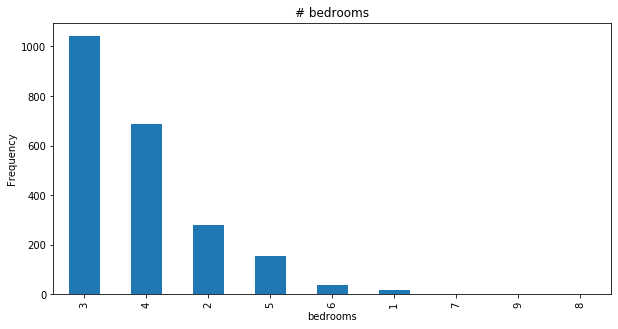

3    1044
4     687
2     280
5     154
6      38
1      18
7       2
9       1
8       1
Name: bedrooms, dtype: int64

In [6]:
ax = hd['bedrooms'].value_counts().plot(kind='bar',
                                    figsize=(10,5),
                                    title="# bedrooms")
ax.set_xlabel("bedrooms")
ax.set_ylabel("Frequency")
plt.show()
hd['bedrooms'].value_counts()

The target variable price is slightly positively skewed in the dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AA096FEB88>]],
      dtype=object)

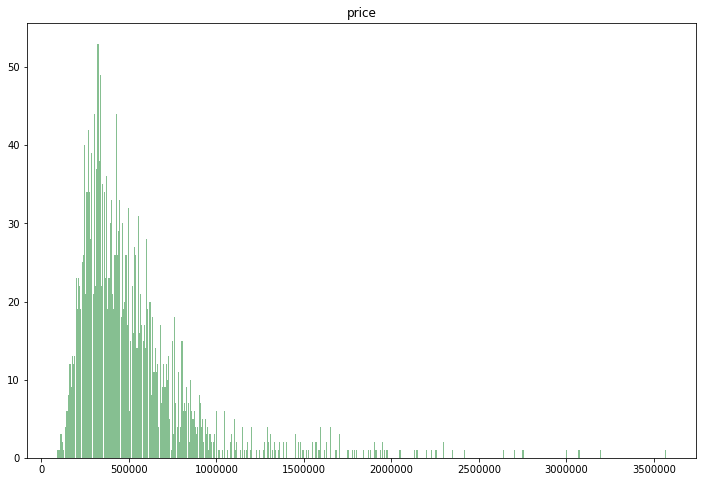

In [7]:
hd.hist(column='price', bins=500, grid=False, figsize=(12,8), color='#86bf91', zorder=3, rwidth=0.9)

### Correlation Matrix and HeatMap to remove columns that are not important

- Weak correlations: Zipcode, Yr_renovated 
- Columns sqft_living and sqft_living15 are highly correlated to each other, while the corrleation of the column sqft_living is stronger with other predictors.
- Similarly, Column sqft_lot and sqft_lot15 are highly correlated to each other, while the corrleation of the column sqft_lot is stronger with other predictors.


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.004724,-0.025710,-0.024450,-0.025910,-0.134683,0.017331,0.014070,0.043323,-0.047973,-0.006088,-0.019563,-0.017423,0.020495,-0.018727,-0.014552,-0.019468,0.018962,-0.007585,-0.133572
price,-0.004724,1.000000,0.282691,0.517018,0.684768,0.126507,0.258877,0.211229,0.429827,0.008744,0.683825,0.602530,0.277012,0.104663,0.094203,-0.062066,0.335857,0.043875,0.586721,0.110575
bedrooms,-0.025710,0.282691,1.000000,0.524898,0.575577,0.047437,0.169025,-0.019683,0.087083,0.028251,0.348931,0.482694,0.294126,0.157037,0.021101,-0.157813,-0.007756,0.129595,0.378441,0.055310
bathrooms,-0.024450,0.517018,0.524898,1.000000,0.755674,0.140563,0.500398,0.025115,0.203315,-0.118048,0.669089,0.700447,0.245914,0.519623,0.045337,-0.184291,0.018480,0.221890,0.555685,0.118668
sqft_living,-0.025910,0.684768,0.575577,0.755674,1.000000,0.216934,0.325251,0.070324,0.307025,-0.043862,0.767237,0.882913,0.395935,0.330283,0.037140,-0.198370,0.049721,0.249343,0.734102,0.214354
sqft_lot,-0.134683,0.126507,0.047437,0.140563,0.216934,1.000000,0.012603,-0.000016,0.070538,-0.001438,0.167234,0.213362,0.041815,0.063314,0.002993,-0.111582,-0.054100,0.252239,0.138207,0.708000
floors,0.017331,0.258877,0.169025,0.500398,0.325251,0.012603,1.000000,0.035332,0.036214,-0.255499,0.438674,0.506408,-0.271694,0.512300,0.016475,-0.054578,0.060478,0.108757,0.244280,-0.011815
waterfront,0.014070,0.211229,-0.019683,0.025115,0.070324,-0.000016,0.035332,1.000000,0.382779,-0.002859,0.061005,0.052441,0.048943,-0.036673,0.116916,0.033156,-0.004311,-0.043038,0.084313,0.026879
view,0.043323,0.429827,0.087083,0.203315,0.307025,0.070538,0.036214,0.382779,1.000000,0.007650,0.281801,0.188595,0.282347,-0.036322,0.094527,0.087416,0.048066,-0.069692,0.316538,0.052384
condition,-0.047973,0.008744,0.028251,-0.118048,-0.043862,-0.001438,-0.255499,-0.002859,0.007650,1.000000,-0.141894,-0.127461,0.163808,-0.316269,-0.056620,-0.032083,-0.060632,-0.030865,-0.084645,-0.001036


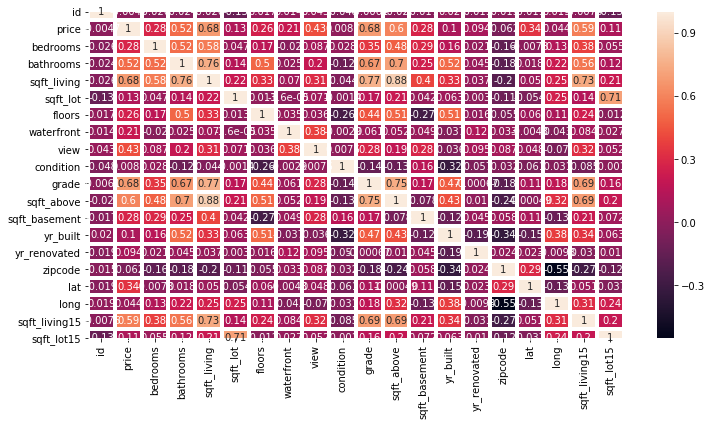

In [8]:
import seaborn as sns

hd_n = hd.drop('date', axis=1)
a= hd_n.corr()
fig=plt.figure(figsize=(12,6))
sns.heatmap(a,annot= True,linewidths=3)
a

## Preprocessing
### Step 1: Dropping columns
- date: Contains Time series data.
- Column id is the unique identifier for the records and it can be removed.
- Based on the correlation matrix, the below columns can be removed: 
sqft_living15, sqft_lot15, Zipcode, Yr_renovated

In [9]:
hd.drop(['id', 'date', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15'], axis = 1, inplace = True)

In [10]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 15 columns):
price            2225 non-null float64
bedrooms         2225 non-null int64
bathrooms        2225 non-null float64
sqft_living      2107 non-null float64
sqft_lot         2225 non-null int64
floors           2225 non-null float64
waterfront       2225 non-null int64
view             2225 non-null int64
condition        2225 non-null int64
grade            2225 non-null int64
sqft_above       2225 non-null int64
sqft_basement    2225 non-null int64
yr_built         2225 non-null int64
lat              2225 non-null float64
long             2225 non-null float64
dtypes: float64(6), int64(9)
memory usage: 260.9 KB


In [11]:
hd.isnull()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2221,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2222,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2223,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Step 2: Replacing missing values
sqft_living: It has missing values. 
- Assumption: The sqft_living depends on the number of bedrooms and bathrooms. So replacing the null values with the mean of the sqft_living group by bedrooms and bathrooms.

In [12]:
#hd['sqft_living'].groupby['bedrooms', 'bathrooms'].median()

print(hd.groupby(['bedrooms', 'bathrooms'])['sqft_living'].mean())
print(hd.groupby(['bedrooms', 'bathrooms'])['sqft_living'].median())

bedrooms  bathrooms
1         0.75          640.000000
          1.00          753.333333
          1.50          760.000000
          1.75         1020.000000
          2.00         1780.000000
                          ...     
6         5.00         3028.000000
7         3.00         2940.000000
          4.75         5370.000000
8         3.00         2850.000000
9         3.00         3680.000000
Name: sqft_living, Length: 84, dtype: float64
bedrooms  bathrooms
1         0.75          470.0
          1.00          710.0
          1.50          760.0
          1.75         1020.0
          2.00         1780.0
                        ...  
6         5.00         3028.0
7         3.00         2940.0
          4.75         5370.0
8         3.00         2850.0
9         3.00         3680.0
Name: sqft_living, Length: 84, dtype: float64


In [13]:
hd['sqft_living'] = hd.groupby(['bedrooms', 'bathrooms']).transform(lambda x: x.fillna(x.mean()))

In [14]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 15 columns):
price            2225 non-null float64
bedrooms         2225 non-null int64
bathrooms        2225 non-null float64
sqft_living      2225 non-null float64
sqft_lot         2225 non-null int64
floors           2225 non-null float64
waterfront       2225 non-null int64
view             2225 non-null int64
condition        2225 non-null int64
grade            2225 non-null int64
sqft_above       2225 non-null int64
sqft_basement    2225 non-null int64
yr_built         2225 non-null int64
lat              2225 non-null float64
long             2225 non-null float64
dtypes: float64(6), int64(9)
memory usage: 260.9 KB


### Step 3: Imputing Categorical/Ordinal variables
The dataset does not contain any categorical values. The ordinal values are good to go ahead with the dataset and model building

### Step 4: Splitting into Train and test Dataset
Using 'sklearn.model_selection.train_test_split'

In [15]:
X = hd.drop('price', axis = 1)
y = hd['price']

In [16]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0)

### Step 5: Scaling the dataset
Using Standard scaler to scale the dataset. The data here is slighlty right_skewed. To make the data relatively normally distributed, we are using the standard scaler.

In [17]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train_org)
X_train = scaler.transform(X_train_org)
X_test = scaler.transform(X_test_org)

#Converting nd array to df
X_train_df = pd.DataFrame(X_train, columns = X.columns)
X_test_df = pd.DataFrame(X_test, columns = X.columns)

In [18]:
X_train_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long
0,-1.520580,-1.383859,-0.860674,-0.181086,-0.862860,-0.081477,-0.307635,-0.572483,-0.493894,-1.099887,-0.632621,-0.740745,1.190783,-0.834561
1,0.719992,-0.095039,-0.836774,-0.135147,0.059145,-0.081477,-0.307635,1.005866,-0.493894,-0.634525,-0.632621,-0.047602,-1.729879,-1.185065
2,-1.520580,-0.739449,-0.033122,-0.188246,0.981151,-0.081477,-0.307635,-0.572483,-0.493894,-0.252690,-0.632621,0.298970,1.160003,-1.017115
3,0.719992,-0.095039,-0.239263,-0.225900,-0.862860,-0.081477,-0.307635,-0.572483,-0.493894,-0.801578,1.516569,-1.572516,0.423340,-0.652007
4,0.719992,-0.417244,-0.744160,-0.120077,-0.862860,-0.081477,-0.307635,2.584216,-0.493894,0.081415,-0.632621,-0.116916,-1.135487,0.881448


## ML Models
1. Import the model
2. Instantiate the model
3. Fit the model
4. evaluate
5. fine tune the model


### 1. K Neighbors Regressor

Text(0, 0.5, 'MSE')

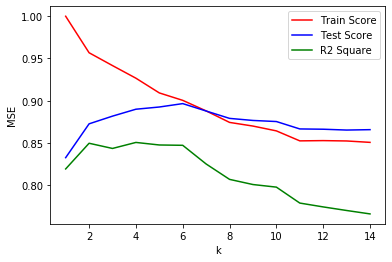

In [19]:
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

train_score_array = []
test_score_array = []
r2_score_array= [] 

for k in range(1,15):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))
    prediction=knn_reg.predict(X_test)
    r2_score_array.append(metrics.r2_score(prediction,y_test))

x_axis = range(1,15)
plt.plot(x_axis, train_score_array, c = 'r', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.plot(x_axis, r2_score_array, c = 'g', label = 'R2 Square')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

In [20]:
print(train_score_array)
print(test_score_array)
print(r2_score_array)

[1.0, 0.9568003908546151, 0.941598878863884, 0.92668000083899, 0.9092450072800581, 0.9004580873311041, 0.8879575632764909, 0.8743490569851585, 0.8700189680205433, 0.8643157551649459, 0.8525023768273018, 0.852810902932916, 0.8523833471166696, 0.8507261454798795]
[0.8326308428111926, 0.8726636442035183, 0.8817705031986233, 0.889961373259567, 0.8925787695396321, 0.8965962331686768, 0.8878275071791588, 0.8791165812579765, 0.8766631860602205, 0.8753815617855336, 0.8666185619281518, 0.8662855546295414, 0.8652989087531562, 0.8657714070022335]
[0.8192939405307347, 0.8496777242438096, 0.8435313126999717, 0.8506497992942547, 0.8476366093842378, 0.8472491874837864, 0.8251433556616028, 0.8069258715586844, 0.8008222811878964, 0.797753882544175, 0.7788940479260944, 0.774333496775526, 0.7701000862076831, 0.7660488642935691]


Based on the Knn regressor without grid search, the best k value is 5. 
- The r-square value for this is 0.8476 with train score 0.9092 and test score 0.8925

### Without Scaling

Text(0, 0.5, 'MSE')

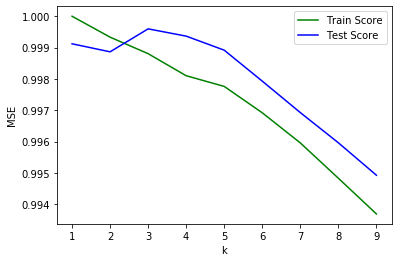

In [21]:
%matplotlib inline
train_score_array = []
test_score_array = []
#r2_score_array= [] 

for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train_org, y_train)
    train_score_array.append(knn_reg.score(X_train_org, y_train))
    test_score_array.append(knn_reg.score(X_test_org, y_test))
    #prediction=knn_reg.predict(X_test)
    #r2_score_array.append(metrics.r2_score(prediction,y_test))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

### KNN Regressor with GridSearch Cross Validation

In [22]:

knn_reg = KNeighborsRegressor()
params = {'n_neighbors':[3,4,5,6,7,8,9], 'leaf_size':[1,2,3], 'weights':['uniform', 'distance'],
          'algorithm':['auto','brute'],   'n_jobs':[-1]}

k_grid = GridSearchCV(knn_reg, param_grid=params,n_jobs=8, verbose=2)
k_grid.fit(X_train,y_train)
print("Suitable Hyper Parameters:\n",k_grid.best_params_)

prediction=k_grid.predict(X_test)
train_score=k_grid.score(X_train,y_train)
test_score=k_grid.score(X_test,y_test)

print ("training score:", train_score) 
print ("test score: ", test_score)
print("r_square:",metrics.r2_score(prediction,y_test))

C:\Users\bhumi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 84 candidates, totalling 252 fits


[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:   13.5s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   18.8s
[Parallel(n_jobs=8)]: Done 252 out of 252 | elapsed:   23.0s finished


Suitable Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 3, 'weights': 'distance'}
training score: 1.0
test score:  0.8837107675360993
r_square: 0.8485836164740445


In [23]:
knn = KNeighborsRegressor(n_neighbors=5)# fit the model using the training data and training targets
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [24]:
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.9092450072800581
0.8925787695396321


## 2. Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, y_train)
prediction = lreg.predict(X_test)
train_score=lreg.score(X_train,y_train)
test_score=lreg.score(X_test,y_test)
print ("training score:", train_score) 
print ("test score: ", test_score)
print("r_square:",metrics.r2_score(prediction,y_test))


training score: 1.0
test score:  1.0
r_square: 1.0


### Linear Regression with Grid Search

In [26]:
l_grid = LinearRegression()
params = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

l_grid1 = GridSearchCV(l_grid, param_grid=params, n_jobs=8,  verbose=2)
l_grid1.fit(X_train,y_train)

print("Best Hyper Parameters:\n",l_grid1.best_params_)
prediction=l_grid1.predict(X_test)
train_score=l_grid1.score(X_train,y_train)
test_score=l_grid1.score(X_test,y_test)

print ("training score:", train_score) 
print ("test score: ", test_score)
print("r_square:",metrics.r2_score(prediction,y_test))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


C:\Users\bhumi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   9 out of  24 | elapsed:    0.0s remaining:    0.1s


Best Hyper Parameters:
 {'copy_X': True, 'fit_intercept': True, 'normalize': True}
training score: 1.0
test score:  1.0
r_square: 1.0


[Parallel(n_jobs=8)]: Done  24 out of  24 | elapsed:    0.1s finished


### 3. Polynomial Regression

In [27]:
from  sklearn.preprocessing  import PolynomialFeatures
train_score_list = []
test_score_list = []
r2_score_array= [] 

for n in range(1,4):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))
    prediction=lreg.predict(X_test_poly)
    r2_score_array.append(metrics.r2_score(prediction,y_test))

In [28]:
print(train_score_list)
print(test_score_list)
print(r2_score_array)

[1.0, 1.0, 1.0]
[1.0, 0.9999929499744639, 0.9999999856883988]
[1.0, 0.9999929486630488, 0.9999999856876909]


Text(0, 0.5, 'Accuracy')

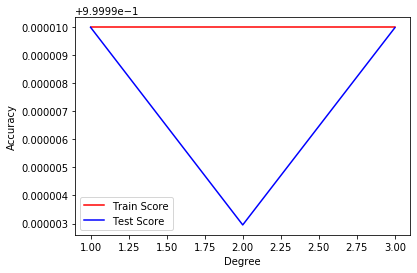

In [29]:
%matplotlib inline

x_axis = range(1,4)
plt.plot(x_axis, train_score_list, c = 'r', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')

plt.legend()
plt.xlabel('Degree')
plt.ylabel('Accuracy')


Considering the train and test scores to not be same, we consider that degree 2 is the best parameter for this model

#### Polynomial Regression with Grid Search

In [30]:
from sklearn.pipeline import make_pipeline
def PolynomialRegression(degree=2, **kwargs):
    
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

param_grid = {'polynomialfeatures__degree': np.arange(3), 
              'linearregression__fit_intercept': [True, False], 
              'linearregression__normalize': [True, False]}
poly_grid = GridSearchCV(PolynomialRegression(), param_grid,cv=10,scoring='neg_mean_squared_error',verbose=2)

poly_grid.fit(X_train, y_train)
best_parameters = poly_grid.best_params_
print(best_parameters)
prediction=poly_grid.predict(X_test)
train_score=poly_grid.score(X_train,y_train)
test_score=poly_grid.score(X_test,y_test)
print ("training score:", train_score) 
print ("test score: ", test_score)
from sklearn import metrics
print("r_square:",metrics.r2_score(prediction,y_test))

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=0 
[CV]  linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=0, total=   0.1s
[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=0 
[CV]  linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=0, total=   0.0s
[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=0 
[CV]  linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=0, total=   0.0s
[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=0 
[CV]  linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=0, total=   0.0s
[CV] linearregression

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=1 
[CV]  linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=1, total=   0.0s
[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=1 
[CV]  linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=1, total=   0.0s
[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=1 
[CV]  linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=1, total=   0.0s
[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=1 
[CV]  linearregression__fit_intercept=True, linearregression__normalize=True, polynomialfeatures__degree=1, total=   0.0s
[CV] linearregression__fit_intercept=True, linearregression__normalize=True, polyno

[CV]  linearregression__fit_intercept=True, linearregression__normalize=False, polynomialfeatures__degree=2, total=   0.1s
[CV] linearregression__fit_intercept=True, linearregression__normalize=False, polynomialfeatures__degree=2 
[CV]  linearregression__fit_intercept=True, linearregression__normalize=False, polynomialfeatures__degree=2, total=   0.1s
[CV] linearregression__fit_intercept=True, linearregression__normalize=False, polynomialfeatures__degree=2 
[CV]  linearregression__fit_intercept=True, linearregression__normalize=False, polynomialfeatures__degree=2, total=   0.1s
[CV] linearregression__fit_intercept=True, linearregression__normalize=False, polynomialfeatures__degree=2 
[CV]  linearregression__fit_intercept=True, linearregression__normalize=False, polynomialfeatures__degree=2, total=   0.0s
[CV] linearregression__fit_intercept=True, linearregression__normalize=False, polynomialfeatures__degree=2 
[CV]  linearregression__fit_intercept=True, linearregression__normalize=Fals

[CV]  linearregression__fit_intercept=False, linearregression__normalize=True, polynomialfeatures__degree=2, total=   0.0s
[CV] linearregression__fit_intercept=False, linearregression__normalize=False, polynomialfeatures__degree=0 
[CV]  linearregression__fit_intercept=False, linearregression__normalize=False, polynomialfeatures__degree=0, total=   0.0s
[CV] linearregression__fit_intercept=False, linearregression__normalize=False, polynomialfeatures__degree=0 
[CV]  linearregression__fit_intercept=False, linearregression__normalize=False, polynomialfeatures__degree=0, total=   0.0s
[CV] linearregression__fit_intercept=False, linearregression__normalize=False, polynomialfeatures__degree=0 
[CV]  linearregression__fit_intercept=False, linearregression__normalize=False, polynomialfeatures__degree=0, total=   0.0s
[CV] linearregression__fit_intercept=False, linearregression__normalize=False, polynomialfeatures__degree=0 
[CV]  linearregression__fit_intercept=False, linearregression__normal

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    6.9s finished
C:\Users\bhumi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Polynomial Regression with GridSearchCV shows that the best paramter for degree is 1 as shown above. 

### 3. Ridge

In [31]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []
r2_score_array = []

for alpha in x_range: 
    ridge = Ridge(alpha) 
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))
    prediction=ridge.predict(X_test)
    r2_score_array.append(metrics.r2_score(prediction,y_test))
    
print(train_score_list)
print(test_score_list)
print(r2_score_array)

[0.9999999998868584, 0.9999999886914491, 0.9999988747361954, 0.9998928238076865, 0.9929406845252264]
[0.999999999891429, 0.9999999891482119, 0.9999989201220852, 0.999897085083118, 0.9931817682647536]
[0.9999999998914275, 0.9999999891468464, 0.9999989187652252, 0.9998958098427071, 0.9924275394959763]


Text(0.5, 0, '$\\alpha$')

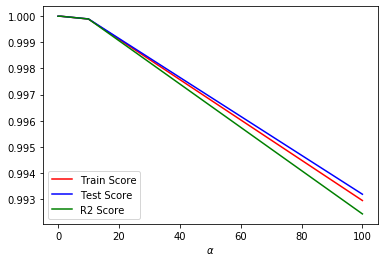

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'r', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.plot(x_range, r2_score_array, c = 'g', label = 'R2 Score')
#plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

The Ridge regression without GridSearch shows mostly the overfitting of the data. The train score here is less than the test score. While the R-SQuare value is good with every value of alpha.

#### Ridge with GridSearchCV

In [33]:
ridge = Ridge(random_state=0, max_iter=1000000)
a_range = [150, 175, 200, 225, 250, 275, 300]
tune_param = [{'alpha': a_range}]
ridge1 = GridSearchCV(ridge, tune_param, cv=10, n_jobs=8, verbose=2)
ridge1.fit(X_train, y_train)
print("Best Hyper Parameters:\n",ridge1.best_params_)
prediction=ridge1.predict(X_test)
train_score=ridge1.score(X_train,y_train)
test_score=ridge1.score(X_test,y_test)
prediction=ridge1.predict(X_test)


print ("training score:", train_score) 
print ("test score: ", test_score)
print("r2:",metrics.r2_score(y_test,prediction))

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


Best Hyper Parameters:
 {'alpha': 150}
training score: 0.9868719302719785
test score:  0.9872820146184441
r2: 0.9872820146184441


[Parallel(n_jobs=8)]: Done  70 out of  70 | elapsed:    0.2s finished


Ridge with GridSearch too shows higher test score than the train score.

### 4. Lasso

In [34]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100, 1000, 10000]
train_score_list = []
test_score_list = []
r2_score_array = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))
    prediction=lasso.predict(X_test)
    r2_score_array.append(metrics.r2_score(prediction,y_test))
    
print(train_score_list)
print(test_score_list)
print(r2_score_array)

[0.9999999800511847, 0.9999999804032993, 0.9999999836529717, 0.9999999992760404, 0.9999999107452332, 0.9999910745233197, 0.9991074523319714]
[0.9999999839384249, 0.9999999841911624, 0.9999999865181869, 0.9999999993263111, 0.9999999103610043, 0.9999910361004278, 0.9991036100427847]
[0.9999999839369502, 0.9999999841897036, 0.9999999865168815, 0.9999999993262825, 0.99999991030742, 0.9999909822991856, 0.9990475502558074]


Text(0.5, 0, '$\\alpha$')

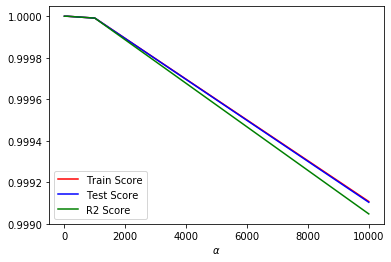

In [35]:
plt.plot(x_range, train_score_list, c = 'r', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.plot(x_range, r2_score_array, c = 'g', label = 'R2 Score')

#plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

#### Lasso with GridSearch

In [36]:

lasso = Lasso(random_state=0, max_iter=1000000)

tune_param = [{'alpha': [0.001,0.01,0.1,10,100, 1000, 10000]}]
lgrid = GridSearchCV(lasso, tune_param, cv=10, n_jobs=8, verbose=2)
lgrid.fit(X_train, y_train)
train_score=lgrid.score(X_train,y_train)
test_score=lgrid.score(X_test,y_test)
print("Suitable Hyper Parameter Value of alpha:\n",lgrid.best_params_)
prediction=lgrid.predict(X_test)
print ("training score:", train_score) 
print ("test score: ", test_score)
from sklearn import metrics
print("r2:",metrics.r2_score(y_test,prediction))

print(lgrid.best_score_)
print(lgrid.best_estimator_.alpha)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


Suitable Hyper Parameter Value of alpha:
 {'alpha': 10}
training score: 0.9999999992760404
test score:  0.9999999993263111
r2: 0.999999999326311
0.9999999989264385
10


[Parallel(n_jobs=8)]: Done  70 out of  70 | elapsed:    0.3s finished


Through both the lasso and with gridsearch, we found that the best value for alpha is 10 where the train, test and R2 scores are most suitable.

### 5. Support Vector Machine

In [38]:
from sklearn.svm import SVR
model1=SVR(kernel='linear',degree=1, gamma='scale', C=100, epsilon=0.2)
model1.fit(X_train,y_train)

prediction=model1.predict(X_test)
train_score=model1.score(X_train,y_train)
test_score=model1.score(X_test,y_test)

print ("training score:", train_score) 
print ("test score: ", test_score)
print("r2:",metrics.r2_score(y_test,prediction))

training score: 0.7195604321493012
test score:  0.7107412878049073
r2: 0.7107412878049073


#### SVR with Grid Search

In [ ]:

svr= SVR()
gamma_svr = [0.01, 0.1, 1, 10, 100]
parameters = {'kernel':['rbf', 'poly', 'linear'], 'C': [1, 10, 100, 125], 
              'gamma': gamma_svr}
svr1 = GridSearchCV(svr, parameters, n_jobs=8, verbose=2)
svr1.fit(X_train, y_train)
print("Best HypConclusion:
- The best machine learning model for this dataset is linear regression with perfect train and test score, however considering all the scenarios model which works the best is the ridge with aplha value 150.  er Parameters:\n",svr1.best_params_)
prediction=svr1.predict(X_test)
train_score=svr1.score(X_train,y_train)
test_score=svr1.score(X_test,y_test)
print ("training score:", train_score) 
print ("test score: ", test_score) 
print("r2:",metrics.r2_score(y_test,prediction))

C:\Users\bhumi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    1.2s


### Conclusion:
- The best machine learning model for this dataset is linear regression with perfect train and test score, however considering all the scenarios model which works the best is the ridge with aplha value 150.  

## Classification 

 Link to source file : https://www.kaggle.com/iabhishekofficial/mobile-price-classification#train.csv
 
 1) We have considered the train.csv file for our classification project.
 
 2) The test.csv file did not have the target columns which would make it difficult to find the accuracy of the models.
 
 3) Our aim is to predict the price intensity of the Mobile phones based on its features.
 
 4) We built KNN classification, Logistic Regression, Linear Support Vector Machine, Kerenilzed Support Vector Machine (rbf, poly, and linear), Decision Tree models on our dataset.
 
5) Grid SearchCv was used to find the best hyperparameters for the given model.

6) Average Train and Test score was calculated using the cross- validation.

7) Lastly, all the models were compared to find the best model for the given dataset.

#### Importing Libraries and Reading File

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
mb = pd.read_csv('Mobile_price_classification.csv')
mb.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20.0,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905.0,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263.0,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,NaN,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208.0,1212,1411,8,2,15,1,1,0,1


In [3]:
mb.shape

(2000, 21)

In [4]:
mb.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,1980.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.570202,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,444.037051,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,565.500000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,948.000000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


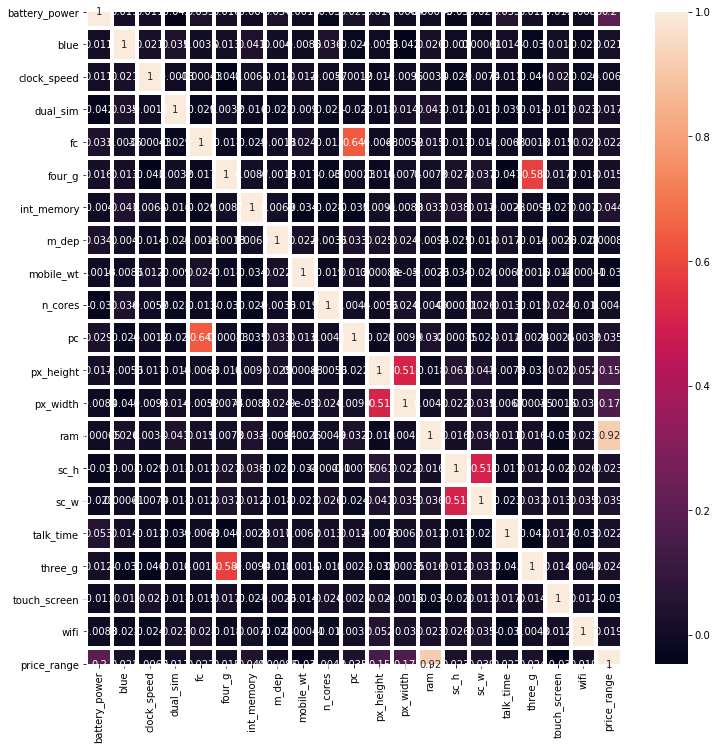

In [5]:
a= mb.corr()
fig=plt.figure(figsize=(12,12))
sns.heatmap(a,annot= True,linewidths=3)

In [6]:
a

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.017185,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.005568,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.017244,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.018372,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.006322,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.015827,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.009138,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.024794,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000876,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.005603,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


#### Imputing the null values with the median of the column

In [7]:
mb.isna().sum()

battery_power      0
blue               0
clock_speed        0
dual_sim           0
fc                 0
four_g             0
int_memory         0
m_dep              0
mobile_wt          0
n_cores            0
pc               102
px_height         20
px_width           0
ram                0
sc_h               0
sc_w               0
talk_time          0
three_g            0
touch_screen       0
wifi               0
price_range        0
dtype: int64

In [8]:
mb['pc'].fillna(mb['pc'].median(), inplace = True) 

In [9]:
mb['px_height'].fillna(mb['px_height'].median(), inplace = True) 

In [10]:
mb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null float64
px_height        2000 non-null float64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(4), int64(17)
memory usage: 328.2 KB


#### Splitting the datset into train and test

In [11]:
from sklearn.model_selection import train_test_split
X = mb.drop('price_range',axis=1)
y = mb['price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 5)

##### Using Scaled data, the algorithm gave us the perfect model(Train Score:1.00, Test Score:1.00). 
It was difficult for us to study the model and do some analyze. So we used the unscaled data. 

### 1) KNN Classifier

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))
print("r_square: {:.4f} ".format(metrics.r2_score(prediction,y_test)))

Train score: 0.9550
Test score: 0.9225
r_square: 0.9385 


#### Grid Search for KNN

In [13]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()

parameters = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
              'leaf_size':[1,3,5],
              'algorithm':['auto', 'kd_tree'],
              'n_jobs':[-1]}

knn = GridSearchCV(knn, param_grid=parameters)
knn = knn.fit(X_train, y_train)
knn.best_params_

{'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 11}

In [36]:
prediction = knn.predict(X_test)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))
print("r_square: {:.4f} ".format(metrics.r2_score(prediction,y_test)))

Train score: 0.9469
Test score: 0.9400
r_square: 0.9527 


#### Fitting the model with best parameters

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(algorithm= 'auto', leaf_size = 1, n_jobs = -1, n_neighbors = 11)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))
print("r_square: {:.4f} ".format(metrics.r2_score(prediction,y_test)))

Train score: 0.9513
Test score: 0.9450
r_square: 0.9563 


#### Cross validation of KNN Model

In [15]:
from sklearn.model_selection import cross_val_score
train_score_list = cross_val_score(knn,X_train,y_train,cv=5)
test_score_list = cross_val_score(knn,X_test,y_test,cv=5)
print("Avg Train Score:%.4f"%train_score_list.mean())
print("Avg Test Score:%.4f"%test_score_list.mean())

Avg Train Score:0.9319
Avg Test Score:0.9150


#### KNN Visualization

In [16]:
from sklearn.neighbors import KNeighborsClassifier

train_score_array = []
test_score_array = []

for k in range(1,20):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_score_array.append(knn.score(X_train, y_train))
    test_score_array.append(knn.score(X_test, y_test))

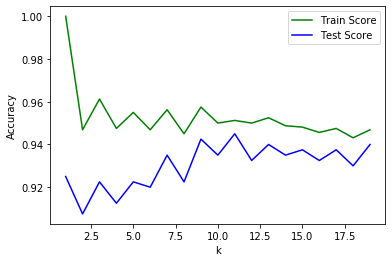

In [17]:
x_axis = range(1,20)
%matplotlib inline
plt.plot(x_axis, train_score_array, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array, label = 'Test Score', c='b')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

### 2) Linear SVC

In [18]:
from sklearn.svm import LinearSVC

linearsvc = LinearSVC(dual = False)
linearsvc.fit(X_train,y_train)
print('Train score: {:.4f}'.format(linearsvc.score(X_train, y_train)))
print('Test score: {:.4f}'.format(linearsvc.score(X_test, y_test)))
prediction = linearsvc.predict(X_test)
print("r_square: {:.4f} ".format(metrics.r2_score(prediction,y_test)))

Train score: 0.8075
Test score: 0.7900
r_square: 0.8484 


#### Grid Search for LinearSVC

In [19]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1','l2']}]
grid_search = GridSearchCV(estimator = linearsvc,
                           param_grid = parameters,
                           scoring = 'accuracy')
grid_search = grid_search.fit(X_train, y_train)
grid_search.best_params_

{'C': 10, 'penalty': 'l1'}

#### Fitting the model with best parameters

In [20]:
from sklearn.svm import LinearSVC

linearsvc = LinearSVC(penalty = 'l1', C= 10, dual=False)
linearsvc.fit(X_train,y_train)
print('Train score: {:.4f}'.format(linearsvc.score(X_train, y_train)))
print('Test score: {:.4f}'.format(linearsvc.score(X_test, y_test)))
prediction = linearsvc.predict(X_test)
print("r_square: {:.4f} ".format(metrics.r2_score(prediction,y_test)))

Train score: 0.8731
Test score: 0.8275
r_square: 0.8722 


#### Cross Validation for linearSVC

In [21]:
from sklearn.model_selection import cross_val_score
train_score_list = cross_val_score(linearsvc,X_train,y_train,cv=5)
test_score_list = cross_val_score(linearsvc,X_test,y_test,cv=5)
print("Avg Train Score:%.4f"%train_score_list.mean())
print("Avg Test Score:%.4f"%test_score_list.mean())

Avg Train Score:0.8400
Avg Test Score:0.7571


### 3) Logistic Regression

In [22]:
# Fitting logistic regression to the Training set
from sklearn.linear_model import LogisticRegression
Log = LogisticRegression()
Log.fit(X_train, y_train)
print('Train score: {:.4f}'.format(Log.score(X_train, y_train)))
print('Test score: {:.4f}'.format(Log.score(X_test, y_test)))
prediction = Log.predict(X_test)
print("r_square: {:.4f} ".format(metrics.r2_score(prediction,y_test)))

Train score: 0.7994
Test score: 0.7750
r_square: 0.8345 


#### Grid Search for logistic Regression

In [23]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.001, 0.01, 0.1, 1, 10, 100,1000], 'penalty': ['l2','l1']}]
grid_search = GridSearchCV(estimator = Log,
                           param_grid = parameters,
                           scoring = 'accuracy', cv=5, n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
grid_search.best_params_

{'C': 100, 'penalty': 'l1'}

#### Fitting model with best parameters

In [24]:
from sklearn.linear_model import LogisticRegression
Log = LogisticRegression(penalty = 'l1', C = 100)
Log.fit(X_train, y_train)
print('Train score: {:.4f}'.format(Log.score(X_train, y_train)))
print('Test score: {:.4f}'.format(Log.score(X_test, y_test)))
prediction = Log.predict(X_test)
print("r_square: {:.4f} ".format(metrics.r2_score(prediction,y_test)))

Train score: 0.8900
Test score: 0.8400
r_square: 0.8769 


#### Cross Validation for logistic Regression

In [25]:
from sklearn.model_selection import cross_val_score
train_score_list = cross_val_score(Log,X_train,y_train,cv=5)
test_score_list = cross_val_score(Log,X_test,y_test,cv=5)
print("Avg Train Score:%.4f"%train_score_list.mean())
print("Avg Test Score:%.4f"%test_score_list.mean())

Avg Train Score:0.8587
Avg Test Score:0.7973


#### Logistic Visualization

In [26]:
from sklearn.linear_model import LogisticRegression

c_range = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c)
    log_l2 = LogisticRegression(penalty = 'l2', C = c)
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

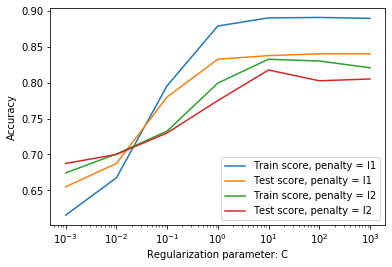

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(c_range, train_score_l1, label = 'Train score, penalty = l1')
plt.plot(c_range, test_score_l1, label = 'Test score, penalty = l1')
plt.plot(c_range, train_score_l2, label = 'Train score, penalty = l2')
plt.plot(c_range, test_score_l2, label = 'Test score, penalty = l2')
plt.legend()
plt.xlabel('Regularization parameter: C')
plt.ylabel('Accuracy')
plt.xscale('log')

### 4) SVC

In [28]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
print('Train score: {:.4f}'.format(svc.score(X_train, y_train)))
print('Test score: {:.4f}'.format(svc.score(X_test, y_test)))
prediction = svc.predict(X_test)
print("r_square: {:.4f} ".format(metrics.r2_score(prediction,y_test)))

Train score: 1.0000
Test score: 0.2300
r_square: 0.0000 


Perfect train score with the lower test score shows that the model is highly overfitting and not suitable for this dataset

#### GridSearch for SVC

In [29]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100], 'kernel': ['linear']},
              {'C': [1, 10, 100], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
            {'C': [1, 10, 100], 'kernel': ['poly'], 'degree': [0, 1, 2, 3, 4, 5, 6]}]
grid_search = GridSearchCV(estimator = svc,
                           param_grid = parameters,
                           scoring = 'accuracy')
grid_search = grid_search.fit(X_train, y_train)
grid_search.best_params_

{'C': 1, 'kernel': 'linear'}

#### Fitting the model with best parameters

In [30]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', C = 1)
svc.fit(X_train, y_train)
print('Train score: {:.4f}'.format(svc.score(X_train, y_train)))
print('Test score: {:.4f}'.format(svc.score(X_test, y_test)))
prediction = svc.predict(X_test)
print("r_square: {:.4f} ".format(metrics.r2_score(prediction,y_test)))

Train score: 0.9881
Test score: 0.9850
r_square: 0.9882 


#### Cross Validation for SVC

In [31]:
from sklearn.model_selection import cross_val_score
train_score_list = cross_val_score(svc,X_train,y_train,cv=5)
test_score_list = cross_val_score(svc,X_test,y_test,cv=5)
print("Avg Train Score:%.4f"%train_score_list.mean())
print("Avg Test Score:%.4f"%test_score_list.mean())


Avg Train Score:0.9706
Avg Test Score:0.9675


### 5) Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)
print('Train score: {:.4f}'.format(decisiontree.score(X_train, y_train)))
print('Test score: {:.4f}'.format(decisiontree.score(X_test, y_test)))
prediction = decisiontree.predict(X_test)
print("r_square: {:.4f} ".format(metrics.r2_score(prediction,y_test)))

Train score: 1.0000
Test score: 0.8550
r_square: 0.8872 


This model seems overfitting

#### Grid Search for Decision Tree

In [33]:
from sklearn.model_selection import GridSearchCV
parameters = [{"max_depth": [1,2,3,4,5,6,7], "criterion": ["gini", "entropy"]}]
grid_search = GridSearchCV(estimator = decisiontree,
                           param_grid = parameters,
                           scoring = 'accuracy')
grid_search = grid_search.fit(X_train, y_train)
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 7}

#### Fitting the model with best parameters

In [34]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7)
decisiontree.fit(X_train, y_train)
print('Train score: {:.4f}'.format(decisiontree.score(X_train, y_train)))
print('Test score: {:.4f}'.format(decisiontree.score(X_test, y_test)))
prediction = decisiontree.predict(X_test)
print("r_square: {:.4f} ".format(metrics.r2_score(prediction,y_test)))

Train score: 0.9563
Test score: 0.8900
r_square: 0.9163 


#### Cross Validation for Decision Tree

In [35]:
from sklearn.model_selection import cross_val_score
train_score_list = cross_val_score(decisiontree,X_train,y_train,cv=5)
test_score_list = cross_val_score(decisiontree,X_test,y_test,cv=5)
print("Avg Train Score:%.4f"%train_score_list.mean())
print("Avg Test Score:%.4f"%test_score_list.mean())

Avg Train Score:0.8313
Avg Test Score:0.7904


### Conclusion:
The best model for classification dataset is the Support Vector Classifier with linear Kernel and C value as 1.